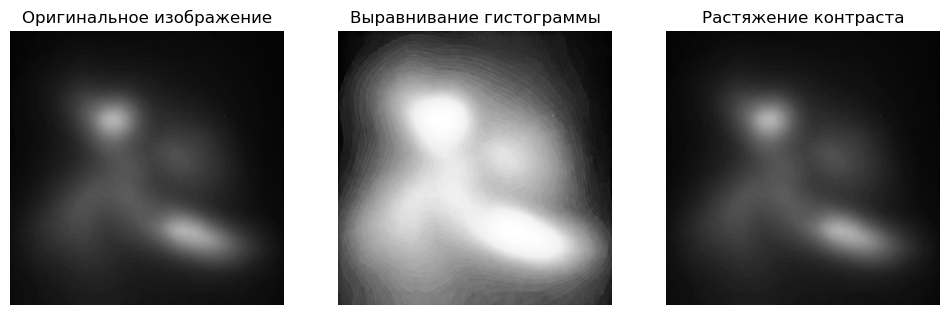

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('Pic5.jpg', 0)  # Загружаем изображение в градациях серого

# --- Выравнивание гистограммы ---
equalized_image = cv2.equalizeHist(image)

# --- Растяжение контраста ---
# Задаем минимальные и максимальные значения для нормализации
min_val = 0
max_val = 255

# Применяем растяжение контраста (нормализацию)
stretched_image = cv2.normalize(image, None, alpha=min_val, beta=max_val, norm_type=cv2.NORM_MINMAX)

# --- Визуализация результатов ---
# Отображаем оригинальное изображение, выравненное и с растянутым контрастом
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Оригинальное изображение")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Выравнивание гистограммы")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Растяжение контраста")
plt.imshow(stretched_image, cmap='gray')
plt.axis('off')

plt.show()


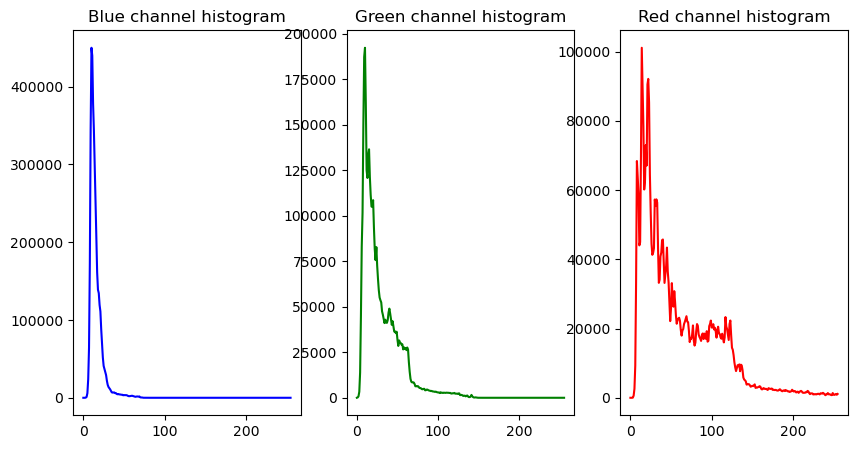

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
img = cv2.imread('Pic5.jpg')

# Разделение изображения на цветовые каналы (BGR)
b, g, r = cv2.split(img)

# Определение количества бинов для гистограммы
histSize = 256
histRange = (0, 256)

# Построение гистограмм для каждого канала
b_hist = cv2.calcHist([b], [0], None, [histSize], histRange)
g_hist = cv2.calcHist([g], [0], None, [histSize], histRange)
r_hist = cv2.calcHist([r], [0], None, [histSize], histRange)

# Визуализация гистограмм
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Blue channel histogram")
plt.plot(b_hist, color='blue')

plt.subplot(1, 3, 2)
plt.title("Green channel histogram")
plt.plot(g_hist, color='green')

plt.subplot(1, 3, 3)
plt.title("Red channel histogram")
plt.plot(r_hist, color='red')

plt.show()


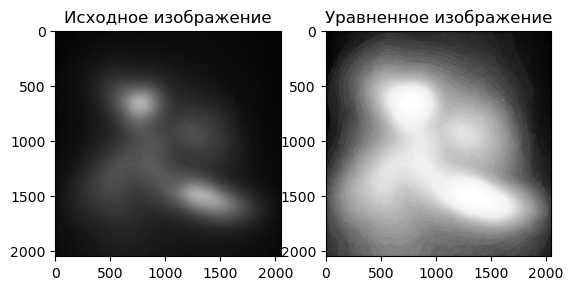

In [3]:
# Конвертируем изображение в оттенки серого
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Уравнивание гистограммы для черно-белого изображения
equalized_img = cv2.equalizeHist(gray_img)

# Отображение результатов
plt.subplot(1, 2, 1)
plt.title("Исходное изображение")
plt.imshow(gray_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Уравненное изображение")
plt.imshow(equalized_img, cmap='gray')

plt.show()


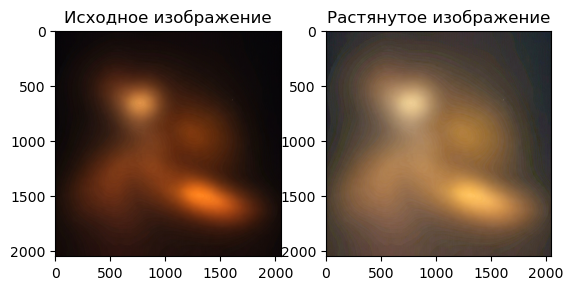

In [4]:
# Устанавливаем коэффициент альфа
alpha = 0.5

# Преобразование изображения в float32
if img.dtype == np.uint8:
    img_float = img.astype(np.float32) / 255
else:
    img_float = img

# Разделение изображения на каналы
b, g, r = cv2.split(img_float)

# Нелинейное растяжение динамического диапазона
def nonlinear_stretch(layer, alpha):
    Imin = layer.min()
    Imax = layer.max()
    stretched = np.clip(((layer - Imin) / (Imax - Imin)) ** alpha, 0, 1)
    return stretched

b_stretched = nonlinear_stretch(b, alpha)
g_stretched = nonlinear_stretch(g, alpha)
r_stretched = nonlinear_stretch(r, alpha)

# Объединение каналов обратно
img_stretched = cv2.merge([b_stretched, g_stretched, r_stretched])

# Преобразование обратно в uint8 (если необходимо)
if img.dtype == np.uint8:
    img_stretched = (img_stretched * 255).astype(np.uint8)

# Отображение результатов
plt.subplot(1, 2, 1)
plt.title("Исходное изображение")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Растянутое изображение")
plt.imshow(cv2.cvtColor(img_stretched, cv2.COLOR_BGR2RGB))

plt.show()


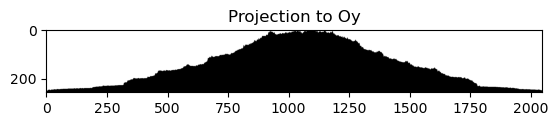

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Шаг 1: Загрузить изображение
image_path = 'Pic4.jpg'
I = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if I is None:
    print(f"Ошибка: изображение не удалось загрузить. Проверьте путь: {image_path}")
else:
    # Шаг 2: Вычислить проекцию на ось Oy
    if I.ndim == 2:
        Proj = np.sum(I, axis=1) / 255  # Горизонтальная проекция
    else:
        Proj = np.sum(I, axis=(1, 2)) / 255 / I.shape[2]

    # Шаг 3: Создать изображение для отображения проекции
    ProjI = np.full((256, Proj.shape[0], 3), 255, dtype=np.uint8)

    # Рисуем график проекции (черный цвет)
    def DrawGraph(image, data, color, max_value):
        for x, value in enumerate(data):
            y = int((value / max_value) * 255)
            cv2.line(image, (x, 255), (x, 255 - y), color)

    DrawGraph(ProjI, Proj, (0, 0, 0), Proj.max())

    # Шаг 4: Используем matplotlib для отображения изображения
    plt.imshow(ProjI, cmap='gray')
    plt.title('Projection to Oy')
    plt.show()


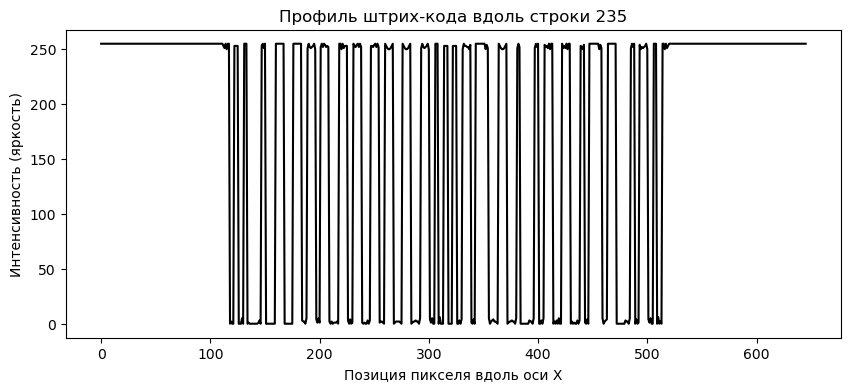

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Шаг 1: Загрузка изображения штрих-кода
image_path = 'Pic3.jpg'  # Замените на путь к вашему изображению
I = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Загрузим изображение в градациях серого

# Проверяем успешность загрузки
if I is None:
    print(f"Ошибка: изображение не удалось загрузить. Проверьте путь: {image_path}")
else:
    # Шаг 2: Определим строку изображения для построения профиля (например, центральная строка)
    row_number = I.shape[0] // 2  # Центральная строка
    profile = I[row_number, :]  # Профиль строки

    # Шаг 3: Построение профиля штрих-кода
    plt.figure(figsize=(10, 4))
    plt.plot(profile, color='black')  # Отобразим профиль
    plt.title(f'Профиль штрих-кода вдоль строки {row_number}')
    plt.xlabel('Позиция пикселя вдоль оси X')
    plt.ylabel('Интенсивность (яркость)')
    plt.show()
